In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Loan_Default.csv")

In [3]:
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [6]:
data.drop(["ID","year"],axis=1,inplace=True)

In [7]:
x = data.drop("Status",axis=1)
y = data["Status"]

In [8]:
x.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region              

<AxesSubplot: >

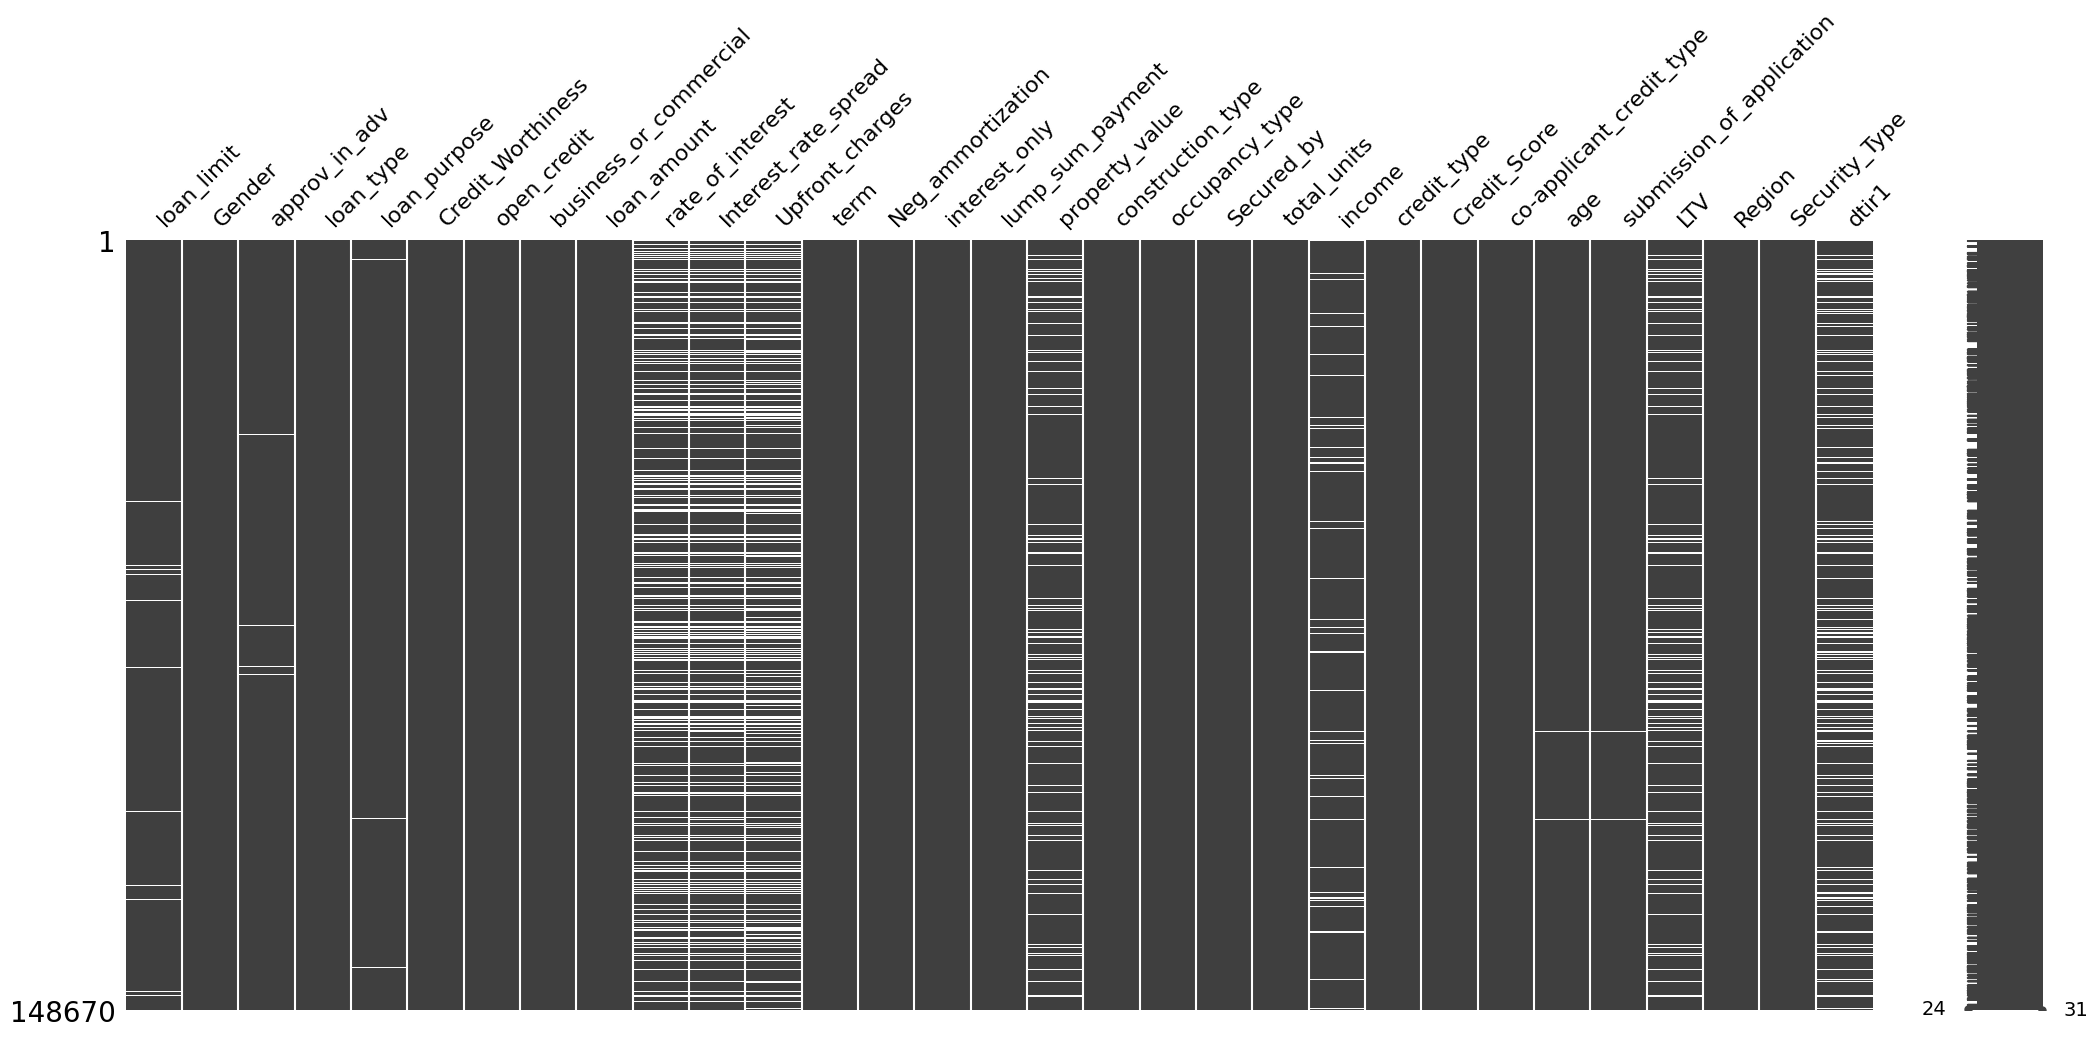

In [9]:
msno.matrix(x)

In [10]:
x.drop(["rate_of_interest","Upfront_charges","Interest_rate_spread",
        "property_value","LTV","dtir1","construction_type",
        "construction_type","Secured_by","Security_Type","term"],axis=1,inplace=True)

In [11]:
categoric = x.select_dtypes(include=["object","category"]).columns
numerics = x.select_dtypes(include=["float64","int64"]).columns

In [12]:
# Data Preprocessing for Categoric columns

In [13]:
x.Gender.unique()
x.Gender = x.Gender.replace("Sex Not Available",np.nan)
x.Gender = x.Gender.replace("Joint",np.nan)

In [14]:
x.Gender.isna().sum()

79058

In [15]:
x.drop("Gender",axis=1,inplace=True)
categoric = categoric.drop("Gender")

In [16]:
x.isna().sum()

loan_limit                   3344
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
occupancy_type                  0
total_units                     0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
dtype: int64

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [18]:
from sklearn.impute import SimpleImputer
frequent = SimpleImputer(strategy="most_frequent")

In [19]:
x[categoric] = frequent.fit_transform(x[categoric])

In [20]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

label_encode = [column for column in categoric if x[column].unique().size == 2]
ord = OrdinalEncoder()
for column in label_encode:
    x[column] = ord.fit_transform(x[[column]])


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe_encode = [column for column in categoric if x[column].nunique() > 2]
ohe = OneHotEncoder(sparse=False, drop='first')  
encoded_data = ohe.fit_transform(x[ohe_encode])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(ohe_encode))
x = pd.concat([x.drop(columns=ohe_encode), encoded_df], axis=1)

c:\Users\LOKMAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
# Data Preprocessing for numerical data

In [23]:
x[numerics].isna().sum()

loan_amount        0
income          9150
Credit_Score       0
dtype: int64

In [24]:
imputer = SimpleImputer(strategy="mean")
x[numerics] = imputer.fit_transform(x[numerics])

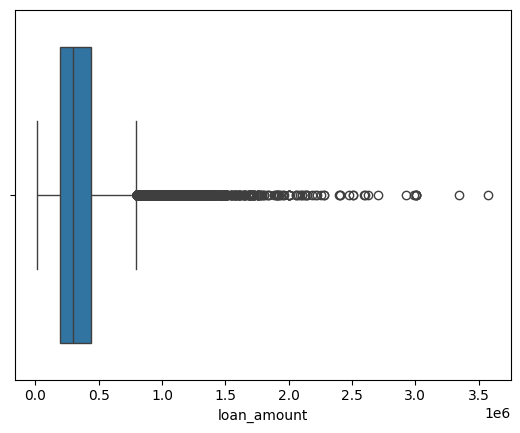

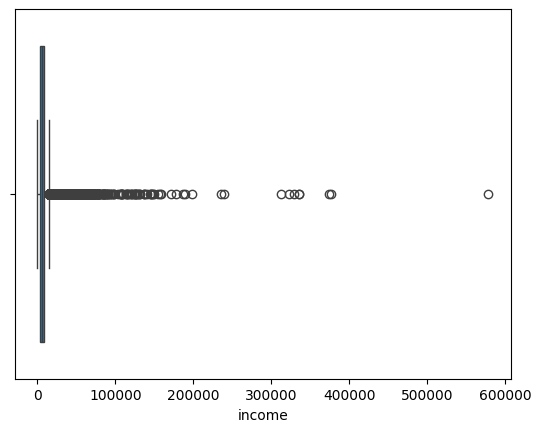

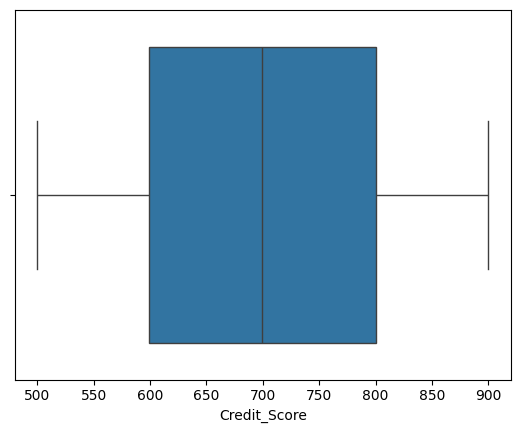

In [25]:
for column in numerics:
    sns.boxplot(x=x[column])
    plt.show()

In [26]:
aykiri_cols = numerics.drop("Credit_Score")

In [27]:
def outlier(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    df[var] = np.clip(df[var], lower_t, upper_t)

In [28]:
for col in aykiri_cols:
    outlier(x,col)

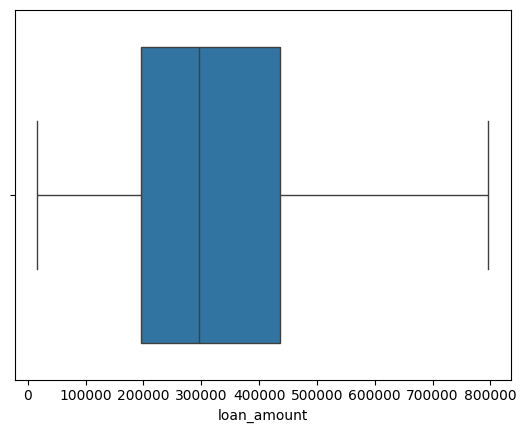

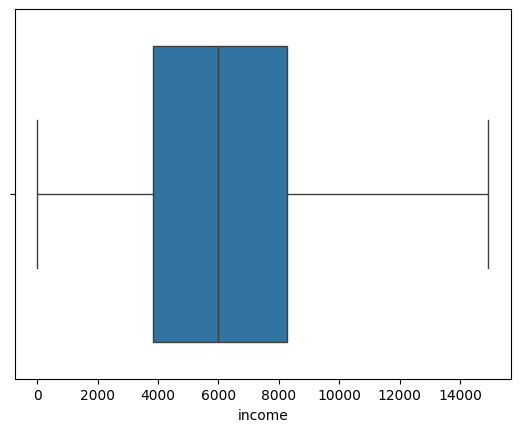

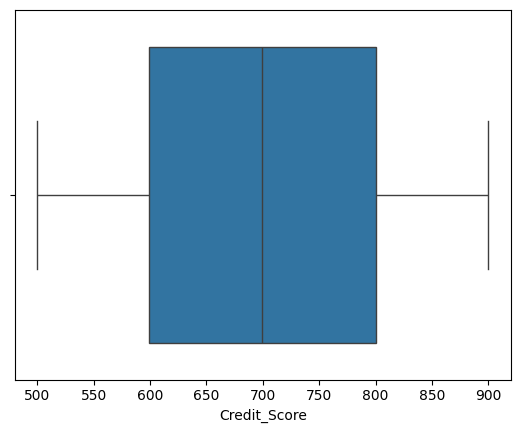

In [29]:
for column in numerics:
    sns.boxplot(x=x[column])
    plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x[numerics] = scalar.fit_transform(x[numerics])

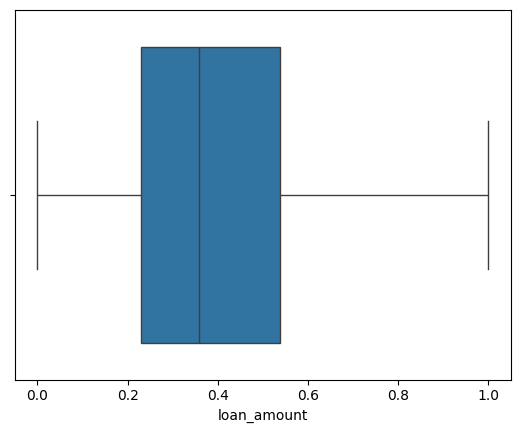

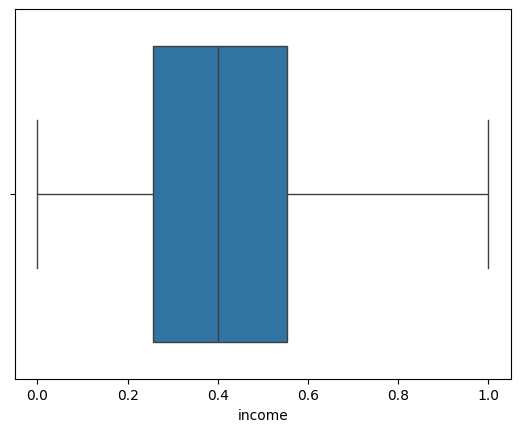

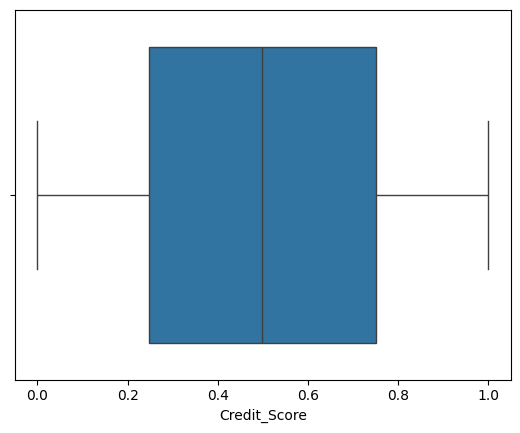

In [31]:
for column in numerics:
    sns.boxplot(x=x[column])
    plt.show()

In [32]:
# Machine Learning

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from pycaret.classification import *

In [34]:
df = pd.concat([x,y],axis=1)

In [35]:
setup(df,target="Status")

,Description,Value
0,Session id,351
1,Target,Status
2,Target type,Binary
3,Original data shape,"(148670, 36)"
4,Transformed data shape,"(148670, 36)"
5,Transformed train set shape,"(104069, 36)"
6,Transformed test set shape,"(44601, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


In [36]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8736,0.8558,0.5190,0.9421,0.6693,0.5991,0.6399,0.8460
gbc,Gradient Boosting Classifier,0.8710,0.8480,0.5013,0.9528,0.6569,0.5867,0.6326,3.6740
rf,Random Forest Classifier,0.8674,0.8332,0.5197,0.9003,0.6590,0.5839,0.6179,4.4940
ada,Ada Boost Classifier,0.8656,0.8378,0.4891,0.9346,0.6421,0.5691,0.6144,1.3030
lr,Logistic Regression,0.8629,0.8324,0.4760,0.9367,0.6312,0.5578,0.6060,2.2540
lda,Linear Discriminant Analysis,0.8613,0.8317,0.4487,0.9749,0.6144,0.5436,0.6046,0.5040
svm,SVM - Linear Kernel,0.8606,0.0000,0.4535,0.9594,0.6158,0.5437,0.6007,0.3460
ridge,Ridge Classifier,0.8602,0.0000,0.4418,0.9800,0.6090,0.5383,0.6018,0.2110
qda,Quadratic Discriminant Analysis,0.8590,0.8143,0.4566,0.9409,0.6148,0.5408,0.5939,0.5600
et,Extra Trees Classifier,0.8561,0.8209,0.5247,0.8285,0.6424,0.5579,0.5808,5.1100


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=351, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [37]:
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8702,0.8462,0.5016,0.9463,0.6556,0.5847,0.6295
1,0.8712,0.8585,0.5172,0.9286,0.6643,0.5925,0.6314
2,0.8733,0.8525,0.5201,0.9381,0.6692,0.5986,0.6385
3,0.8754,0.8604,0.5228,0.9484,0.6740,0.6048,0.6458
4,0.8734,0.8536,0.5205,0.9382,0.6695,0.5990,0.6388
5,0.8773,0.8591,0.5298,0.9503,0.6804,0.6119,0.6519
6,0.8716,0.8539,0.5103,0.9424,0.6621,0.5914,0.6338
7,0.8750,0.8607,0.5228,0.9457,0.6734,0.6038,0.6444
8,0.8748,0.8553,0.5275,0.9370,0.6750,0.6048,0.6431


In [38]:
import joblib
joblib.dump(best_model,"model.save")

['model.save']

In [39]:
# Deep Learning

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=30)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.models import load_model

In [77]:
model = Sequential()
model.add(Dense(5000))
model.add(LeakyReLU(alpha= -0.1))
model.add(Dropout(0.3))
model.add(Dense(1000))
model.add(LeakyReLU(alpha= -0.1))
model.add(Dropout(0.25))
model.add(Dense(400))
model.add(LeakyReLU(alpha= -0.1))
model.add(Dense(100))
model.add(LeakyReLU(alpha= -0.1))
model.add(Dense(25))
model.add(LeakyReLU(alpha= -0.1))
model.add(Dense(10))
model.add(LeakyReLU(alpha= -0.1))
model.add(Dense(1,"sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [78]:
checkpoint_file = "best_model"
checkpoint = ModelCheckpoint(
    checkpoint_file,
    monitor='val_accuracy',
    save_best_only=True
)

In [79]:
model.fit(x_train,y_train,epochs=100,callbacks=checkpoint,validation_data=(x_test,y_test))

Epoch 1/100
3107/3113 [============================>.] - ETA: 0s - loss: 0.3629 - accuracy: 0.8614INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 26s 8ms/step - loss: 0.3630 - accuracy: 0.8614 - val_loss: 0.3597 - val_accuracy: 0.8620
Epoch 2/100
3106/3113 [============================>.] - ETA: 0s - loss: 0.3510 - accuracy: 0.8658INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 28s 9ms/step - loss: 0.3510 - accuracy: 0.8658 - val_loss: 0.3509 - val_accuracy: 0.8622
Epoch 3/100
3111/3113 [============================>.] - ETA: 0s - loss: 0.3454 - accuracy: 0.8673INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 22s 7ms/step - loss: 0.3454 - accuracy: 0.8674 - val_loss: 0.3439 - val_accuracy: 0.8676
Epoch 4/100
3105/3113 [============================>.] - ETA: 0s - loss: 0.3417 - accuracy: 0.8688INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 24s 8ms/step - loss: 0.3417 - accuracy: 0.8688 - val_loss: 0.3421 - val_accuracy: 0.8677
Epoch 5/100
3107/3113 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8707INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 27s 9ms/step - loss: 0.3392 - accuracy: 0.8707 - val_loss: 0.3421 - val_accuracy: 0.8701
Epoch 6/100
3113/3113 [==============================] - ETA: 0s - loss: 0.3374 - accuracy: 0.8711INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 25s 8ms/step - loss: 0.3374 - accuracy: 0.8711 - val_loss: 0.3372 - val_accuracy: 0.8708
Epoch 7/100
3112/3113 [============================>.] - ETA: 0s - loss: 0.3348 - accuracy: 0.8725INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 23s 7ms/step - loss: 0.3348 - accuracy: 0.8725 - val_loss: 0.3398 - val_accuracy: 0.8708
Epoch 8/100
3113/3113 [==============================] - 23s 7ms/step - loss: 0.3332 - accuracy: 0.8726 - val_loss: 0.3401 - val_accuracy: 0.8693
Epoch 9/100
3113/3113 [==============================] - 19s 6ms/step - loss: 0.3323 - accuracy: 0.8737 - val_loss: 0.3465 - val_accuracy: 0.8691
Epoch 10/100
3111/3113 [============================>.] - ETA: 0s - loss: 0.3313 - accuracy: 0.8739INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 20s 6ms/step - loss: 0.3313 - accuracy: 0.8739 - val_loss: 0.3345 - val_accuracy: 0.8717
Epoch 11/100
3113/3113 [==============================] - 19s 6ms/step - loss: 0.3309 - accuracy: 0.8738 - val_loss: 0.3361 - val_accuracy: 0.8709
Epoch 12/100
3109/3113 [============================>.] - ETA: 0s - loss: 0.3296 - accuracy: 0.8743INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 20s 6ms/step - loss: 0.3296 - accuracy: 0.8742 - val_loss: 0.3355 - val_accuracy: 0.8722
Epoch 13/100
3113/3113 [==============================] - 18s 6ms/step - loss: 0.3290 - accuracy: 0.8746 - val_loss: 0.3432 - val_accuracy: 0.8682
Epoch 14/100
3113/3113 [==============================] - 18s 6ms/step - loss: 0.3283 - accuracy: 0.8750 - val_loss: 0.3377 - val_accuracy: 0.8719
Epoch 15/100
3108/3113 [============================>.] - ETA: 0s - loss: 0.3269 - accuracy: 0.8752INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


3113/3113 [==============================] - 20s 6ms/step - loss: 0.3270 - accuracy: 0.8751 - val_loss: 0.3338 - val_accuracy: 0.8727
Epoch 16/100
3113/3113 [==============================] - 19s 6ms/step - loss: 0.3270 - accuracy: 0.8756 - val_loss: 0.3342 - val_accuracy: 0.8714
Epoch 17/100
3113/3113 [==============================] - 19s 6ms/step - loss: 0.3255 - accuracy: 0.8758 - val_loss: 0.3340 - val_accuracy: 0.8725
Epoch 18/100
3113/3113 [==============================] - 19s 6ms/step - loss: 0.3255 - accuracy: 0.8758 - val_loss: 0.3347 - val_accuracy: 0.8718
Epoch 19/100
3113/3113 [==============================] - 19s 6ms/step - loss: 0.3250 - accuracy: 0.8768 - val_loss: 0.3359 - val_accuracy: 0.8719
Epoch 20/100
3113/3113 [==============================] - 18s 6ms/step - loss: 0.3240 - accuracy: 0.8766 - val_loss: 0.3371 - val_accuracy: 0.8719
Epoch 21/100
3113/3113 [==============================] - 24s 8ms/step - loss: 0.3230 - accuracy: 0.8773 - val_loss: 0.3380 - val_a

In [84]:
model = load_model("best_model")

In [85]:
model.evaluate(x_train,y_train)

3113/3113 [==============================] - 10s 3ms/step - loss: 0.3208 - accuracy: 0.8782


[0.32076776027679443, 0.8781523704528809]

In [86]:
model.evaluate(x_test,y_test)

1534/1534 [==============================] - 5s 3ms/step - loss: 0.3338 - accuracy: 0.8727


[0.3337894678115845, 0.8726509213447571]